In [1]:
from time24_Data import TrainDataset, TestDataset 
from periodic_activations import SineActivation, CosineActivation
import torch
from torch.utils.data import DataLoader
from torch import nn
from Model import Model
import numpy as np
import pandas as pd

In [2]:
# data

trndataset = TrainDataset()
tesdataset = TestDataset()

train_loader = DataLoader(trndataset, batch_size=1000, shuffle=False)
test_loader = DataLoader(tesdataset, batch_size=len(tesdataset), shuffle=False)

In [6]:
time2vec = Model("sin", 42)

loss_fn = nn.BCELoss()

optimizer = torch.optim.Adam(time2vec.parameters(), lr=1e-4)

num_epochs = 150

for ep in range(num_epochs):

    loss_train={
        'crossentropy':[]
    }

    for x, y in train_loader:
        optimizer.zero_grad()

        _, y_pred = time2vec(x.unsqueeze(1).float())
        
        loss = loss_fn(y_pred, y.unsqueeze(1).float())

        loss.backward()
        optimizer.step()
        
        loss_train['crossentropy'].append(loss.item())

    loss_train_mean = np.mean(loss_train['crossentropy'])

    if ep%10 == 0 :
        
        print("epoch: {}, loss:{}".format(ep, loss_train_mean))

epoch: 0, loss:4.29796576426353
epoch: 10, loss:0.5442474088919016
epoch: 20, loss:0.5176933210941008
epoch: 30, loss:0.4958711169016214
epoch: 40, loss:0.47714531716005304
epoch: 50, loss:0.4611469762928692
epoch: 60, loss:0.4476866948383826
epoch: 70, loss:0.4366054098915171
epoch: 80, loss:0.42771218551529777
epoch: 90, loss:0.42086268391138243
epoch: 100, loss:0.4176057538500539
epoch: 110, loss:0.4132017285367589
epoch: 120, loss:0.41122852192248827
epoch: 130, loss:0.39683226670747923
epoch: 140, loss:0.3787745452589459


In [7]:
print(time2vec)

Model(
  (l1): SineActivation()
  (fc1): Linear(in_features=42, out_features=1, bias=True)
  (act): Sigmoid()
)


In [13]:
dummy_data = np.arange(24, 96)
dummy_data_tensor = torch.Tensor(dummy_data)

In [14]:
with torch.no_grad():
    time2vec.eval()
    pred, _ = time2vec(dummy_data_tensor.unsqueeze(1).float())
plot_x = np.array(pred)

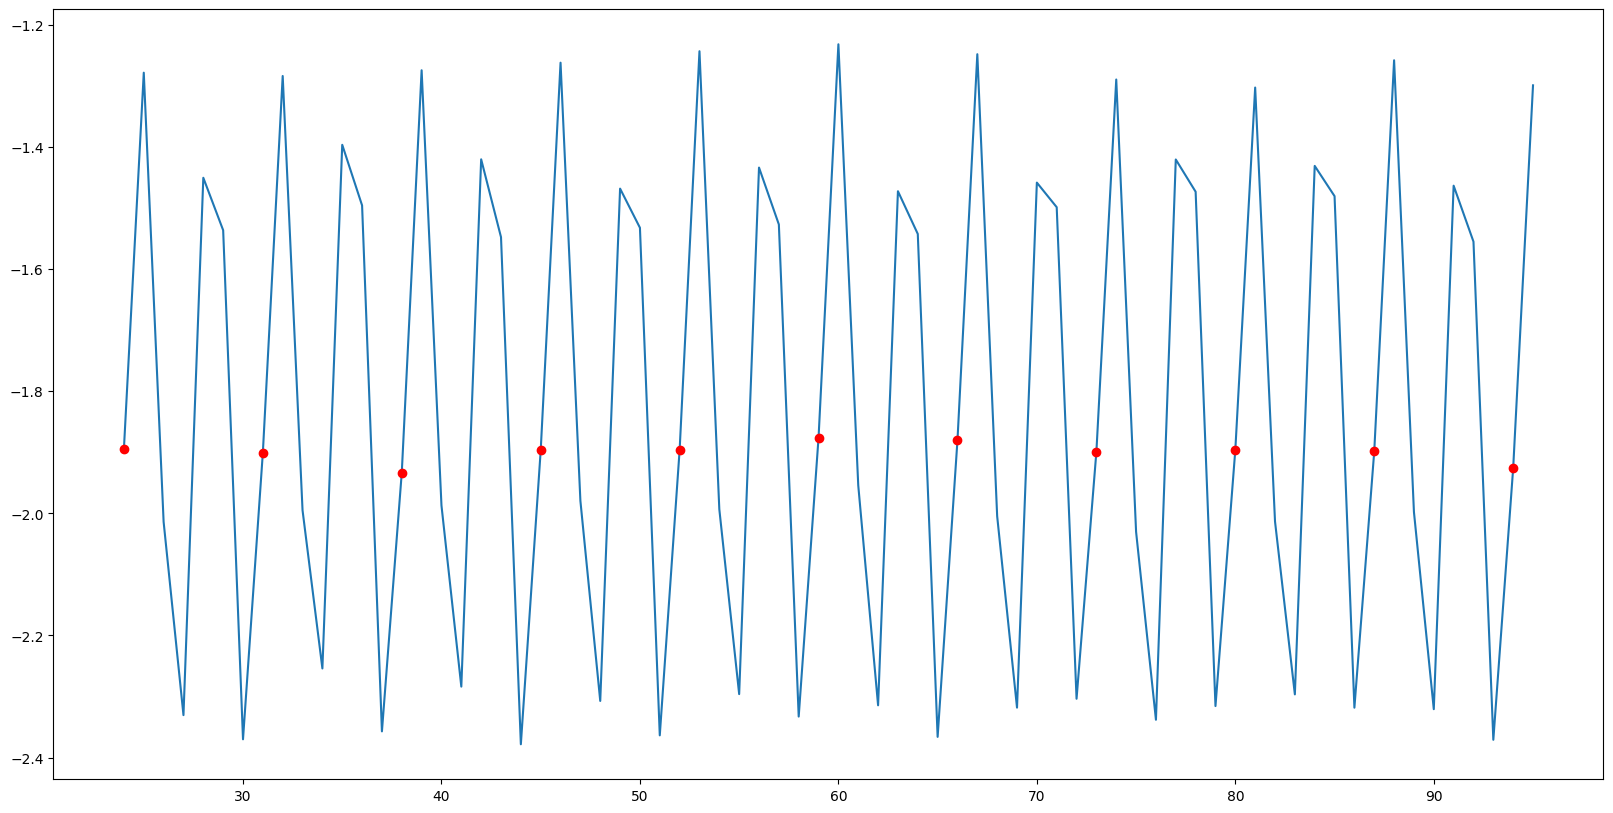

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(dummy_data, plot_x)

# x 값이 7의 배수인 경우 빨간색 마커 추가

with torch.no_grad():
    x_24_multiples = torch.Tensor(np.arange(24, 96, 7))  # 7의 배수인 x 값
    y_24_multiples, _ = time2vec(x_24_multiples.unsqueeze(1).float())  # 해당 x 값에 대응하는 y 값


plt.plot(np.arange(24, 96, 7), y_24_multiples, marker='o', linestyle='', color='red')  # 빨간색 원형 마커로 추가


plt.show()